<a href="https://colab.research.google.com/github/hadeyema/playground-6psrqy2u/blob/master/P5CleanExp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consignes projet 5
Anticipez les besoins en consommation électrique de bâtiments

Lien vers données : https:https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_rows", 101)
pd.options.display.max_columns = 999

In [2]:
customers = pd.read_csv('/content/olist_customers_dataset.csv')
geolocalisation = pd.read_csv('/content/olist_geolocation_dataset.csv')
order_items = pd.read_csv('/content/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/olist_orders_dataset.csv')
products = pd.read_csv('/content/olist_products_dataset.csv')
sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
translation = pd.read_csv('/content/product_category_name_translation.csv')

# **EXPLORATION**

In [3]:
translation.sample(3)

,product_category_name,product_category_name_english
8,telefonia,telephony
52,sinalizacao_e_seguranca,signaling_and_security
12,papelaria,stationery


In [4]:
sellers.sample(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3037,a938325a4b357fd23a6a4d5bb126408e,26510,nilopolis,RJ
2871,62d977e2b2aee830de3e039a28490d12,80410,curitiba,PR
1129,9baf5cb77970f539089d09a38bcec5c3,13330,indaiatuba,SP


In [5]:
products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8333,4d9e8a6d8d07e4f47e093b8c2999ae01,eletronicos,60.0,517.0,4.0,200.0,16.0,6.0,14.0
25714,ffc88104d219c1b767d566fd93653dd2,utilidades_domesticas,49.0,428.0,2.0,675.0,33.0,9.0,32.0
15296,ba664def852b1416351aaf61e2c7b1a5,casa_construcao,59.0,1072.0,4.0,250.0,16.0,11.0,11.0
6079,e4d56c64196ecb182e719d9bacd0628a,bebes,60.0,1217.0,2.0,500.0,25.0,4.0,18.0
6312,313f8ed3413f949a1c0eb1cd6495ae5d,cama_mesa_banho,52.0,222.0,1.0,7150.0,40.0,20.0,40.0


In [6]:
orders.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
92858,823e71d0dc92309fa71dd871bd749694,813ee016af3782ec4c37a1d24fe4bb24,delivered,2018-05-13 21:53:17,2018-05-13 22:13:44,2018-05-15 14:48:00,2018-05-22 22:48:41,2018-06-04 00:00:00
49297,b30e55fe9fd40e07925199c964a7ef3f,1f3ba3284cbf9d2d47bfa7fde6b54c93,delivered,2017-12-29 14:00:03,2017-12-29 14:07:26,2018-01-03 18:23:34,2018-01-04 20:22:35,2018-01-18 00:00:00
85218,928186dcfbb7994142aaebad08b3bd90,ad320ddb59cbeef8b4d647bcb770c33f,delivered,2017-05-18 11:23:26,2017-05-18 11:35:11,2017-05-19 09:13:37,2017-05-24 15:57:59,2017-06-07 00:00:00


In [7]:
order_items.sample(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
28618,412d2be13fcba6c139d5c9998e77a7c6,1,428142062f95deb5d5c834e4f0313000,4c8b8048e33af2bf94f2eb547746a916,2018-08-14 03:05:15,68.1,14.06
9501,15bed8e2fec7fdbadb186b57c46c92f2,1,61d52f4882421048afd530db53d6f230,fa74b2f3287d296e9fbd2cc80f2d1cf1,2017-09-20 14:30:09,125.9,12.38
77944,b15c7e972c74684414fb2e659fce916a,1,e272c7b6c21c38e8ee510666a28460d4,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-05-17 04:10:25,1199.0,23.14


In [8]:
order_payments.sample(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
18116,88821a1158691d3d5f4e35004aeb2aee,2,voucher,1,49.73
16609,7d211ad04e2a788e75109de959ce3171,1,credit_card,1,134.13
80837,90a35d6c7ac144ef7398458a2beb3963,1,credit_card,1,45.21


In [9]:
order_reviews.sample(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
97910,a5c7607be90c49f812bfdc06b128ed0c,4ad2ebd3c62db5a8509e3f25fb8b81ca,4,NaN,NaN,2017-03-17 00:00:00,2017-03-20 14:18:08
83556,f8d9c2ae5189c068d7c43d496ca61175,32e5c1d5c29ff85ee47ad979c88317fb,4,NaN,"O produto de ótima qualidade , veio uma pelicu...",2017-12-19 00:00:00,2017-12-22 00:22:19
60054,6549ad40a1c759014c4f9717a6984633,ba239cc3d3cdeccc06b0bae56e3e9f93,4,NaN,NaN,2018-05-05 00:00:00,2018-05-09 20:34:00


In [10]:
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
46657,cd231250cef44820e21c182155927cc8,aed1f8465914d50cf2bd3b1792da3341,15770,tres fronteiras,SP
35460,1cdcff42fb99ee8d452a29856484240f,775c64377c5e51988914dd66f4f46b53,7091,guarulhos,SP
48922,b25516225aaee75742ba090f74f31617,ef5503ad4aa936ce7306d4f5664c8e31,3344,sao paulo,SP
90639,78183fa5a3a4f305a30940b0fd3ea92a,d0a1ac16d6c99f67c377c77f21cda925,18411,itapeva,SP
87661,bc29c3658c31ccba69cbcc370e11e8e2,ed64cf9aa7a7028f4a7ba14dbc08de41,6112,osasco,SP


In [11]:
geolocalisation.sample(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
847459,80630,-25.462445,-49.272138,curitiba,PR
787547,72015,-15.835764,-48.050897,brasília,DF
444860,22290,-22.955263,-43.180707,rio de janeiro,RJ


In [12]:
liste_df = [customers, 
            geolocalisation,
            order_items,
            order_payments,
            order_reviews,
            orders,products,
            sellers,
            translation]

In [13]:
noms_df = ['customers', 
           'geolocalisation',
           'order_items',
           'order_payments',
           'order_reviews',
           'orders',
           'products',
           'sellers',
           'translation']

**Dimensions des jeux de données**

In [14]:
for df in liste_df :
    print(df.shape)
 

(99441, 5)
(1000163, 5)
(112650, 7)
(103886, 5)
(100000, 7)
(99441, 8)
(32951, 9)
(3095, 4)
(71, 2)


**Données manquantes**

In [15]:
for df in liste_df:
    print(df.isna().sum().sum()/df.shape[0]/df.shape[1], 'NaN')

0.0 NaN
0.0 NaN
0.0 NaN
0.0 NaN
0.20933142857142856 NaN
0.00616948743476031 NaN
0.008254681193287003 NaN
0.0 NaN
0.0 NaN


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
order_reviews.isna().sum(axis=0)

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [18]:
orders.isna().sum(axis=0)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [19]:
products.isna().sum(axis=0)

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Doublons**

In [20]:
for df in liste_df:
    print(df.duplicated().sum())

0
261831
0
0
0
0
0
0
0


**Types des données et mode des données**

In [21]:
i=0
liste_indices = []
liste_colonnes = []
liste_types = []
liste_uniques = []

for df in liste_df:

    for column in df.columns:
        liste_indices.append(noms_df[i])
        liste_colonnes.append(column)
        liste_types.append(df[column].dtype)
        liste_uniques.append(df[column].nunique())
    i+=1
resume_data = pd.DataFrame([liste_indices, 
                            liste_colonnes, 
                            liste_types, 
                            liste_uniques]
                          ).T
resume_data.columns=['Donnees', 'Nom colonne', 'Type', 'valeurs uniques']
resume_data

,Donnees,Nom colonne,Type,valeurs uniques
0,customers,customer_id,object,99441
1,customers,customer_unique_id,object,96096
2,customers,customer_zip_code_prefix,int64,14994
3,customers,customer_city,object,4119
4,customers,customer_state,object,27
5,geolocalisation,geolocation_zip_code_prefix,int64,19015
6,geolocalisation,geolocation_lat,float64,717358
7,geolocalisation,geolocation_lng,float64,717613
8,geolocalisation,geolocation_city,object,8011
9,geolocalisation,geolocation_state,object,27


**Observations:**

    
    customers
davantage de valeurs différentes pour customer_id que customer_unique_id. Etrange
customer_state pourrait être catéogrisé
    
    geolocalisation
plus de villes que dans la base de données customers :
geolocation_state pourrait être catégorisé
    
    order_items
order_item_id contient 21 types différents. Etrange
autant de seller_id que dans la base ed données sellers
shipping_limit_date : à mettre en format date
    
    order_payments :
order_id contient autant de valeurs que dans order
payment_sequential et payment_type pourraient être catégories
    
    orders
order_purchase_timestamp : à mettre en format date
order_approved_at : à mettre en format date
order_delivered_carrier_date : à mettre en format date
order_delivered_customer_date : à mettre en format date
order_estimated_delivery_date : à mettre en format date
    
    products:
74 catégories différentes
    
    sellers:
translation : 3 catégories non traduites

# **Fonction de nettoyage**

**contrôle**

In [22]:
def controle_df(liste_donnees):
    '''Vérifications de type et de la taille du jeu de données pour correspondre 
    au jeu initial
    
    Prend en entrée une liste de dataframes
    Retourne un Booléen
    True dans le cas d'une liste de 9 objects de type dataframe
    False dans le cas contraire
    '''
    if type(liste_donnees) is list:
        if len(liste_donnees) == 9:
            for df in liste_donnees:
                if type(df) is not type(pd.DataFrame()):
                    return False
        else:
            return False
    else:
        return False
    return True

**Nettoyage**

In [23]:
def nettoyage(liste_donnees):
    '''Nettoyage des différents dataframe
    Entrée : liste de 9 dataframes
    
    Traitement appliqué : 
    * complétion des NaN, 
    * nettoyage type, 
    * merge catégories de produits
    
    Return : liste des dataframe nettoyée
    '''
    if not controle_df(liste_donnees):
        return False

    customers_local = liste_donnees[0].copy()
    geolocalisation_local  = liste_donnees[1].copy()
    order_items_local  = liste_donnees[2].copy()
    order_payments_local  = liste_donnees[3].copy()
    order_reviews_local  = liste_donnees[4].copy()
    orders_local  = liste_donnees[5].copy()
    products_local = liste_donnees[6].copy()
    sellers_local = liste_donnees[7].copy()
    translation_local = liste_donnees[8].copy()

    
    #Traitement des NaN
    geolocalisation_local.drop_duplicates(inplace=True)
    
    order_reviews_local['review_comment_title'].fillna(' ',
                                                       inplace=True)
    order_reviews_local['review_comment_message'].fillna(' ',
                                                         inplace=True)
    
    orders['order_approved_at'].fillna(-1, inplace=True)
    orders['order_delivered_carrier_date'].fillna(0, inplace=True)
    orders['order_delivered_customer_date'].fillna(0, inplace=True)
    
    products_local['product_category_name'].fillna('Unkwown', 
                                                   inplace=True)
    products_local['product_name_lenght'].fillna(0, inplace=True)
    products_local['product_description_lenght'].fillna(0, 
                                                        inplace=True)
    products_local['product_photos_qty'].fillna(0, inplace=True)
    products_local['product_weight_g'].fillna(0, inplace=True)
    products_local['product_length_cm'].fillna(0, inplace=True)
    products_local['product_height_cm'].fillna(0, inplace=True)
    products_local['product_width_cm'].fillna(0, inplace=True)
    
    #nettoyage types:
    order_items_local['shipping_limit_date'] = order_items_local[
        'shipping_limit_date'].astype('datetime64')
    orders_local['order_purchase_timestamp'] = orders_local[
        'order_purchase_timestamp'].astype('datetime64')
    orders_local['order_approved_at'] = pd.to_datetime(orders_local[
        'order_approved_at'], errors='coerce')
    orders_local['order_delivered_carrier_date'] = pd.to_datetime(
        orders_local['order_delivered_carrier_date'], errors='coerce')
    orders_local['order_delivered_customer_date'] = pd.to_datetime(
        orders_local['order_delivered_customer_date'], errors='coerce')
    orders_local['order_estimated_delivery_date'] = orders_local[
        'order_estimated_delivery_date'].astype('datetime64')
    
    #merge des catégories de produits
    products_local = pd.merge(products_local, translation_local).drop(
        ['product_category_name'], axis=1)
    
    return [
        customers_local, 
        geolocalisation_local, 
        order_items_local, 
        order_payments_local, 
        order_reviews_local, 
        orders_local, 
        products_local, 
        sellers_local, 
        translation_local]

In [24]:
liste_df = nettoyage(liste_df)

**Assemblage, traitement outliers et feature engineering**

mapping categories

In [25]:
dict_categories = {
#home
'furniture_living_room' : 'home',
'furniture_mattress_and_upholstery' : 'home',
'furniture_bedroom' : 'home',
'furniture_decor' : 'home',
'bed_bath_table' : 'home',
'kitchen_dining_laundry_garden_furniture' : 'home',
'la_cuisine' : 'home',
'home_confort' : 'home',
'home_comfort_2' : 'home',
'christmas_supplies' : 'home',
    
#appliances
'small_appliances' : 'appliances',
'small_appliances_home_oven_and_coffee' : 'appliances',
'home_appliances_2' : 'appliances',
'home_appliances' : 'appliances',
'housewares' : 'appliances',
    
#construction
'construction_tools_construction': 'construction',
'costruction_tools_garden': 'construction',
'costruction_tools_tools': 'construction',
'construction_tools_safety': 'construction',
'construction_tools_lights': 'construction',
'home_construction': 'construction',
'air_conditioning': 'construction',
#furnitures
    
#office
'office_furniture' : 'office',
'industry_commerce_and_business' : 'office',
'stationery' : 'office',
'agro_industry_and_commerce' : 'office',
'signaling_and_security' : 'office',
'furnitures' : 'office',
'security_and_services' : 'office',
#electronics
'telephony' : 'electronics',
'electronics': 'electronics',
'computers_accessories': 'electronics',
'consoles_games': 'electronics',
'fixed_telephony': 'electronics',
'audio': 'electronics',
'computers': 'electronics',
'tablets_printing_image': 'electronics',
#sports_leisure
'sports_leisure' : 'sports_leisure',
'musical_instruments': 'sports_leisure',
'party_supplies': 'sports_leisure',
'luggage_accessories': 'sports_leisure',
#arts
'books' : 'arts',
'books_imported': 'arts',
'books_general_interest': 'arts',
'books_technical': 'arts',
'art': 'arts',
'toys': 'arts',
'cine_photo': 'arts',
'cds_dvds_musicals': 'arts',
'music': 'arts',
'dvds_blu_ray': 'arts',
'arts_and_craftmanship': 'arts',
#fashion
'watches_gifts' : 'fashion',
'fashion_bags_accessories' : 'fashion',
'fashion_underwear_beach' : 'fashion',
'fashion_shoes' : 'fashion', 
'fashion_male_clothing' : 'fashion',
'fashio_female_clothing' : 'fashion',
'fashion_sport' : 'fashion',
'fashion_childrens_clothes' : 'fashion',
#health_beauty
'health_beauty' : 'health_beauty', 
'baby': 'health_beauty',
'diapers_and_hygiene' : 'health_beauty',
'perfumery' : 'health_beauty',
#garden and pets
'flowers' : 'garden_pets',
'pet_shop' : 'garden_pets',
'garden_tools' : 'garden_pets',
#auto
'auto' : 'auto',
#food_drinks
'food_drink' : 'food_drinks',
'food' : 'food_drinks',
'drinks' : 'food_drinks',
#other
'Unknown' : 'other',
'market_place' : 'other', 
'cool_stuff' : 'other'}

outliers

In [26]:
from sklearn.neighbors import LocalOutlierFactor

def delete_univariate_outliers(dataframe):
    '''Suppression des valeurs extrêmes du dataset - on exclut le centile le plus extreme
    Entree: objet dataframe
    Traitement : Supression Nan univariés
    Sortie : objet dataframe
    '''
    #valeurs extremes
    index_nan = []
    index_nan_flat = []
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :

        
        index_nan.append(dataframe.loc[dataframe[column] > dataframe[
            column].quantile(0.99)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < dataframe[
            column].quantile(0.01)].index.tolist())

    for sublist in index_nan:
        for item in sublist:
            index_nan_flat.append(item)
                
    #suppression des doublons
    index_nan_flat = list(dict.fromkeys(index_nan_flat))
    dataframe[column].loc[index_nan_flat] = np.nan

    return dataframe.dropna(axis=0)

def delete_multivariate_outliers(dataframe):
    '''Suppression des outliers multivariés 
    (1% le plus éloigné par le calcul de la distance aux 5 plus proches voisins)
    Entree : objet dataframe
    Sortie : objet dataframe
    '''
    
    lof = LocalOutlierFactor(n_neighbors = 5, n_jobs=-1)
    lof.fit_predict(dataframe.select_dtypes(['float64','int32']).dropna())
    indices = dataframe.select_dtypes(['float64','int32']).dropna().index
    df_lof = pd.DataFrame(index = indices,
                           data = lof.negative_outlier_factor_, columns=['lof'])
    index_to_drop = df_lof[df_lof['lof']< np.quantile(
        lof.negative_outlier_factor_, 0.01)].index
    return dataframe.drop(index_to_drop, axis=0)

def clean_outliers(dataframe):
    dataframe = delete_univariate_outliers(dataframe)

    dataframe = delete_multivariate_outliers(dataframe)
    return dataframe

Fonction de nettoyage globale

In [27]:
def apply_features(liste_donnees):
    '''Application traitement complet et création de nouvelles features
    
    Traitement:
    * Création de nouvelles features
    * Merge de l'ensemble des dataframe dans un seul dataframe sur la clé client unique
    * nettoyage des outliers
    
    Entree : liste d\'objets 
    Sortie : dataframe cleané
    '''
    
    
    print('###Création features###')
    customers_local = liste_donnees[0].copy()
    geolocalisation_local  = liste_donnees[1].copy()
    order_items_local  = liste_donnees[2].copy()
    order_payments_local  = liste_donnees[3].copy()
    order_reviews_local  = liste_donnees[4].copy()
    orders_local  = liste_donnees[5].copy()
    products_local = liste_donnees[6].copy()
    sellers_local = liste_donnees[7].copy()
    translation_local = liste_donnees[8].copy()
    
    #Nombre de produits achetés par client
    produits_par_client = pd.merge(customers_local, 
                           pd.merge(order_items_local, 
                                    orders_local))
    
    nb_produits = produits_par_client.groupby('customer_id')['product_id'].count()
    nb_produits.rename('Nb_tot_pdts', inplace=True)
    
    #Nombre d'achats total par client
    produits_par_client = pd.merge(customers_local, 
                               pd.merge(order_items_local, 
                                        orders_local))
    
    nb_produits = produits_par_client.groupby('customer_id')['product_id'].count()
    nb_produits.rename('Nb_pdts', inplace=True)
    
    #100 premières villes
    first_cities = customers_local.groupby(['customer_city']).count()[
        'customer_state'].sort_values(ascending=False).head(100).index.tolist()
    index_cities = customers_local[~customers_local['customer_city'].isin(
        first_cities)].index
    customers_local.loc[index_cities, 'customer_city'] = 'Other'
    
    #Catégorie la plus achetée
    cat = pd.merge(produits_par_client, products_local).sort_values(
        ['customer_id','product_category_name_english'], ascending=False).groupby(
        ['customer_id','product_category_name_english']).head(1)[[
        'customer_unique_id', 'product_category_name_english']]
    cat.columns = ['customer_unique_id', 'Cat_la_plus_achetee']
    cat.set_index('customer_unique_id', inplace=True)

    #Montant moyen des achats
    achats_moy = pd.merge(order_items_local, orders_local).groupby(
        ['customer_id', 'order_id'])['price'].sum().groupby(['customer_id']).mean()
    achats_moy.rename('Tot_moy_achats', inplace=True)

    #Montant maximum des achats
    achats_max = pd.merge(order_items_local, orders_local).groupby(
        ['customer_id', 'order_id'])['price'].max().groupby(['customer_id']).max()
    achats_max.rename('Mont_max_achats',inplace=True)
    
    #Nombre moyen de produits par commande
    nb_moyen_prod = pd.merge(order_items_local, orders_local).groupby(
        ['customer_id', 'order_id'])['price'].count().groupby(['customer_id']).mean()
    nb_moyen_prod.rename('Nb_moy_pdts_par_com', inplace=True)
    
    #délai moyen de livraison
    '''delai_delivery = pd.merge(orders_local, order_items_local)[
        'order_delivered_customer_date'] -pd.merge(
        orders_local, order_items_local)['order_purchase_timestamp']
    delai_delivery.rename('Delai_Moy_Commande', inplace=True)
    delai_delivery.reindex(orders_local['customer_id'])'''
    
    delai_delivery = pd.merge(orders_local, order_items_local)
    delai_delivery.set_index('customer_id', inplace=True)
    delai_delivery = delai_delivery['order_delivered_customer_date'] - delai_delivery[
        'order_purchase_timestamp']
    delai_delivery.rename('Delai_Moy_Commande', inplace=True)
    delai_delivery = delai_delivery.dt.days +1
    #delai_delivery.reindex(orders_local['customer_id'])
    #delai_delivery = pd.DataFrame(orders['customer_id'])
    
    #heure du dernier achat
    date_achat = pd.merge(order_items_local, orders_local)[[
        'customer_id', 'order_purchase_timestamp']].groupby(['customer_id']).max()
    date_achat['heure_achat'] = date_achat['order_purchase_timestamp'].apply(
        lambda x: x.hour)

    #jour de la semaine du dernier achat
    date_achat['jour_achat'] = date_achat['order_purchase_timestamp'].apply(
        lambda x: x.weekday())

    #nombre de jours écoulés depuis dernier achat
    date_achat['delai_dernier_achat'] = date_achat['order_purchase_timestamp'].max() -  date_achat[
        'order_purchase_timestamp']
    date_achat['delai_dernier_achat'] = date_achat['delai_dernier_achat'].apply(lambda x: x.days)
    
    #note moyenne des commentaires
    note_moy = pd.merge(order_reviews_local, orders_local).groupby(
        'customer_id')['review_score'].mean()#moyen de paiement le plus utilisé
    note_moy.rename('Note_Moy_Com', inplace=True)
    
    #moyen de paiement le plus utilisé
    paiement = pd.merge(orders_local, order_payments_local).sort_values(
        ['customer_id','payment_type','payment_installments'],ascending=False).groupby(
        ['customer_id', 'payment_type','payment_installments']).head(1)[[
        'customer_id', 'payment_type','payment_installments']]
    paiement.columns = ['customer_id', 'Moy_Paiment','Facilités']
    paiement.set_index('customer_id', inplace=True)

    customers_local.set_index('customer_id', inplace=True)
    for df in [nb_produits, 
               achats_moy, 
               achats_max, 
               delai_delivery, 
               nb_moyen_prod, 
               date_achat, 
               note_moy, 
               paiement]:
        customers_local = pd.merge(left = customers_local,
                                   right = df,
                                   how = 'left',
                                   left_index=True, 
                                   right_index=True)
    

    customers_local.reset_index(inplace=True)
    cat.reset_index(inplace=True)
    
    customers_local['customer_id'] = customers_local['customer_id'].astype('object')
    cat['customer_unique_id'] = cat['customer_unique_id'].astype('object')
    #customers_local = customers_local.join(cat, on='customer_id')
    customers_local = pd.merge(left=cat, 
                               right=customers_local, 
                               on='customer_unique_id', 
                               how='right')
    
    customers_local.reset_index(inplace=True)
    
    print('###Cleaning NaN###')
    # Cleaning des NaN des features
    customers_local['Cat_la_plus_achetee'].fillna('Unknown', inplace=True)
    customers_local[['Nb_pdts', 
                     'Tot_moy_achats', 
                     'Mont_max_achats', 
                     'Nb_moy_pdts_par_com']].dropna(
        how='all', axis=0, inplace=True)
    customers_local['Delai_Moy_Commande'].fillna(-1, inplace=True)
    customers_local.dropna(axis=0, inplace=True)

    
    print('###Aggrégation des features sur id client unique###')
    #aggregation des clients par identifiant unique
    dict_agg = {'Cat_la_plus_achetee' : lambda x: x.mode()[0],
           'customer_zip_code_prefix' : lambda x: x.mode()[0],
           'customer_city' : lambda x: x.mode()[0],
           'customer_city' : lambda x: x.mode()[0],
           'customer_state' : lambda x: x.mode()[0],
           'Nb_pdts' : 'sum',
           'Tot_moy_achats' : 'mean',
           'Mont_max_achats' : 'max',
           'Delai_Moy_Commande' : 'mean',
           'Nb_moy_pdts_par_com' : 'mean',
           'order_purchase_timestamp' : 'max',
           'heure_achat' : lambda x: x.mode()[0],
           'jour_achat' : lambda x: x.mode()[0],
           'delai_dernier_achat' : 'min',
           'Note_Moy_Com' : 'mean',
           'Moy_Paiment' : lambda x: x.mode()[0],
           'Facilités' : 'mean',
            'geolocation_lat' : 'mean',
            'geolocation_lng' : 'mean',
                
           ('price', 'home') : 'sum',
           ('price', 'appliances') : 'sum',
           ('price', 'construction') : 'sum',
           ('price', 'office') : 'sum',
           ('price', 'electronics') : 'sum',
           ('price', 'arts') : 'sum',
           ('price', 'fashion') : 'sum',
           ('price', 'health_beauty') : 'sum',
           ('price', 'sports_leisure') : 'sum',
           ('price', 'garden_pets') : 'sum',
           ('price', 'auto') : 'sum',
           ('price', 'food_drinks') : 'sum',
           ('price', 'other') : 'sum'
               }
    
    print('###Ajout des dépenses par catégories###')
    #montant dépensé par catégorie de produits
    table_cat = pd.merge(customers_local, 
                     pd.merge(
                         pd.merge(
                             pd.merge(products_local, translation_local),
                             order_items_local),
                         orders_local)
                        )[['customer_unique_id', 
                           'product_category_name_english', 'price']]

    table_cat['product_category_name_english'] = table_cat[
        'product_category_name_english'].map(dict_categories)

    table_cat = pd.pivot_table(table_cat,
                  index='customer_unique_id',
                  columns = 'product_category_name_english',
                  aggfunc=np.sum,
                  fill_value=0).reset_index()
        
    customers_local = pd.merge(customers_local, 
                               table_cat, 
                               left_on = 'customer_unique_id', 
                               right_on = 'customer_unique_id')

    
    geol = pd.merge(customers_local, 
                               geolocalisation_local, 
                               how='left', 
                               left_on='customer_zip_code_prefix', 
                               right_on='geolocation_zip_code_prefix'
                              ).groupby(
        'customer_unique_id').mean()[['geolocation_lat', 'geolocation_lng']].reset_index()
    
    customers_local = pd.merge(customers_local, 
                               geol, 
                               left_on = 'customer_unique_id', 
                               right_on = 'customer_unique_id')
    
    
    customers_local = customers_local.groupby('customer_unique_id').agg(dict_agg)
    customers_local['Cat_la_plus_achetee'] = customers_local[
        'Cat_la_plus_achetee'].map(dict_categories) 
    
    print('###Outliers###')
    #nettoyage des outliers
    print('taille du jeu de données pré-nettoyage outliers : ', customers_local.shape)
    customers_local = clean_outliers(customers_local)
    print('taille du jeu de données post-nettoyage outliers : ', customers_local.shape)
    
    print('###Log transformation###')
    #transformation log
    columns_log = ['Tot_moy_achats', 'Mont_max_achats']
    customers_local[columns_log] = np.log(customers_local[columns_log])
    return customers_local

In [28]:
data_clients = apply_features(liste_df)

###Création features###
###Cleaning NaN###
###Aggrégation des features sur id client unique###
###Ajout des dépenses par catégories###


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


###Outliers###
taille du jeu de données pré-nettoyage outliers :  (94087, 31)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


taille du jeu de données post-nettoyage outliers :  (75231, 31)
###Log transformation###


In [29]:
data_clients.head(5)

,Cat_la_plus_achetee,customer_zip_code_prefix,customer_city,customer_state,Nb_pdts,Tot_moy_achats,Mont_max_achats,Delai_Moy_Commande,Nb_moy_pdts_par_com,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,"(price, home)","(price, appliances)","(price, construction)","(price, office)","(price, electronics)","(price, arts)","(price, fashion)","(price, health_beauty)","(price, sports_leisure)","(price, garden_pets)","(price, auto)","(price, food_drinks)","(price, other)"
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,home,7787,Other,SP,1.0,4.866765,4.866765,7.0,1.0,2018-05-10 10:56:27,10.0,3.0,115.0,5.0,credit_card,8.0,-23.340262,-46.831085,129.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,6053,osasco,SP,1.0,2.939162,2.939162,4.0,1.0,2018-05-07 11:11:27,11.0,0.0,118.0,4.0,credit_card,1.0,-23.559044,-46.788516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.9,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,office,88115,sao jose,SC,1.0,4.234107,4.234107,26.0,1.0,2017-03-10 21:05:03,21.0,4.0,541.0,3.0,credit_card,8.0,-27.543010,-48.634938,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,electronics,18040,sorocaba,SP,1.0,5.192957,5.192957,14.0,1.0,2017-11-14 19:45:42,19.0,1.0,292.0,5.0,credit_card,6.0,-23.505588,-47.469820,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004bd2a26a76fe21f786e4fbd80607f,garden_pets,5036,sao paulo,SP,1.0,5.036953,5.036953,2.0,1.0,2018-04-05 19:33:16,19.0,3.0,150.0,4.0,credit_card,8.0,-23.515693,-46.690031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0


In [30]:
data_clients.columns

Index([      'Cat_la_plus_achetee',  'customer_zip_code_prefix',
                   'customer_city',            'customer_state',
                         'Nb_pdts',            'Tot_moy_achats',
                 'Mont_max_achats',        'Delai_Moy_Commande',
             'Nb_moy_pdts_par_com',  'order_purchase_timestamp',
                     'heure_achat',                'jour_achat',
             'delai_dernier_achat',              'Note_Moy_Com',
                     'Moy_Paiment',                 'Facilités',
                 'geolocation_lat',           'geolocation_lng',
                 ('price', 'home'),     ('price', 'appliances'),
         ('price', 'construction'),         ('price', 'office'),
          ('price', 'electronics'),           ('price', 'arts'),
              ('price', 'fashion'),  ('price', 'health_beauty'),
       ('price', 'sports_leisure'),    ('price', 'garden_pets'),
                 ('price', 'auto'),    ('price', 'food_drinks'),
                ('price',

# **Exploration**
**informations jeu de données initial** 

Historique

In [31]:
orders['order_purchase_timestamp'].max()

'2018-10-17 17:30:18'

In [32]:
orders['order_purchase_timestamp'].min()

'2016-09-04 21:15:19'

On a 2 années d'historique : de septembre 2016 à octobre 2018

**Nombre de clients** 

In [33]:
customers['customer_unique_id'].nunique()

96096

**Nombre de transactions**

In [34]:
orders['order_id'].nunique()

99441

On a presque autant de clients que de transactions => peu de clients ont fait plus d'une transaction

**Nombre de vendeurs**

In [35]:
sellers['seller_id'].nunique()

3095

**Nombre de clients par vendeur**

In [36]:
pd.merge(order_items, orders).groupby(
    ['seller_id','customer_id']).count().reset_index().groupby(
    'seller_id').count()['customer_id'].sum()

100010

**jeu de donnée préparé**

**Distribution des variables **

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


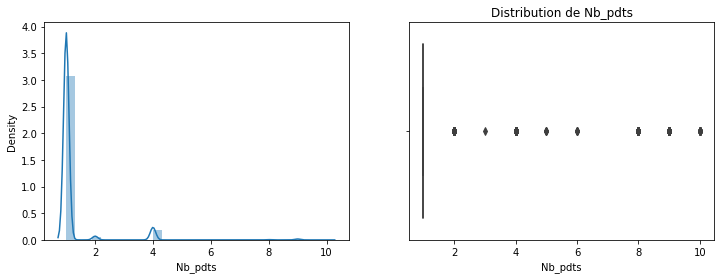

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


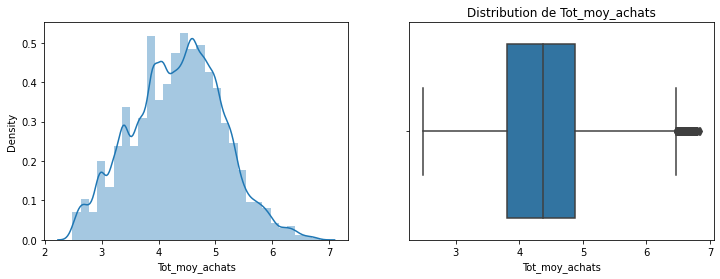

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


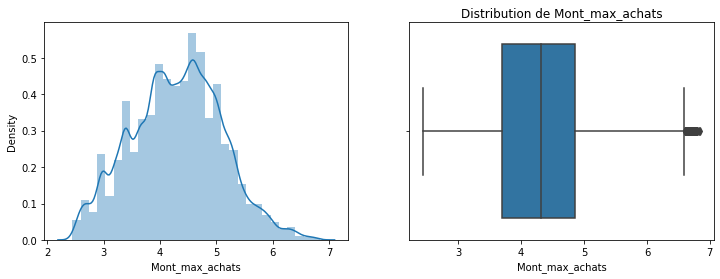

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


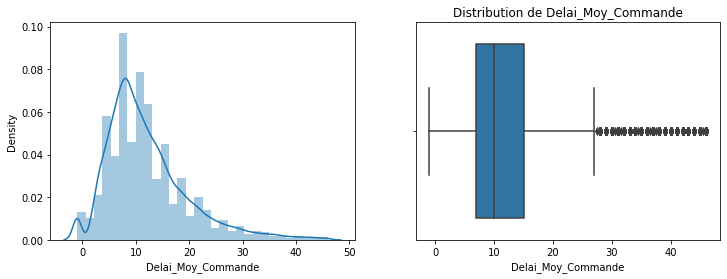

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


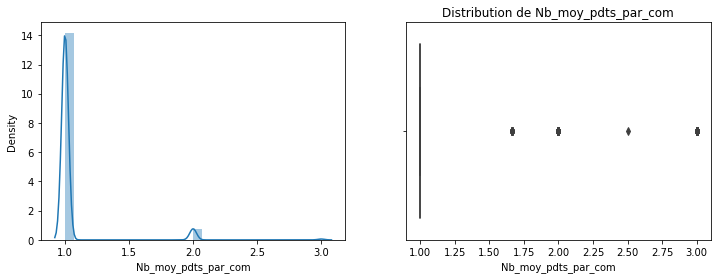

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


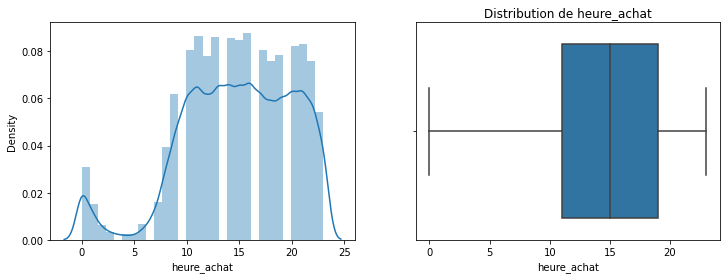

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


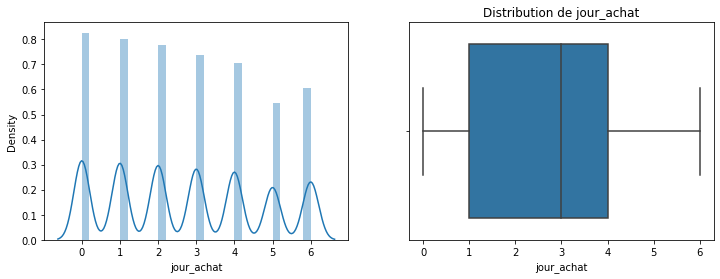

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


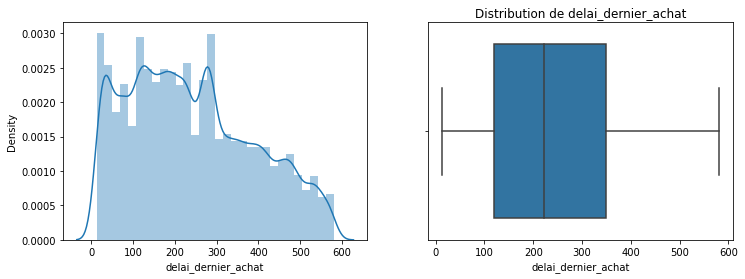

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


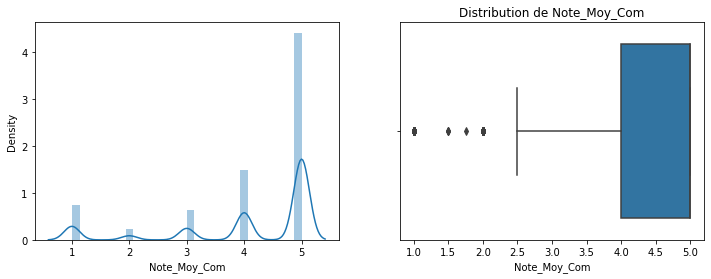

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


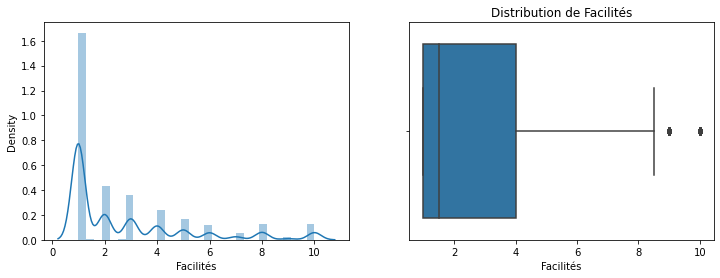

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


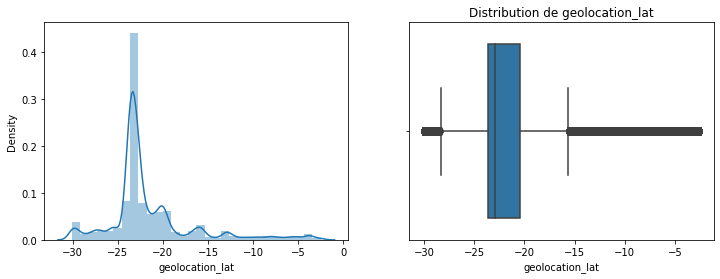

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


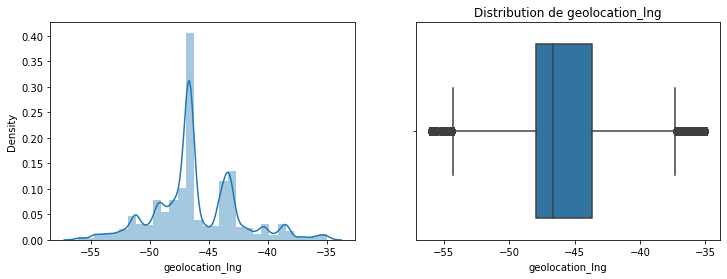

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


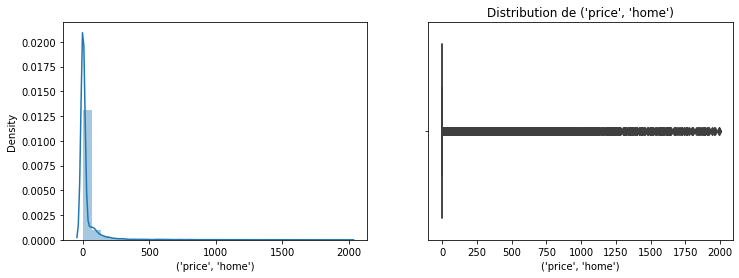

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


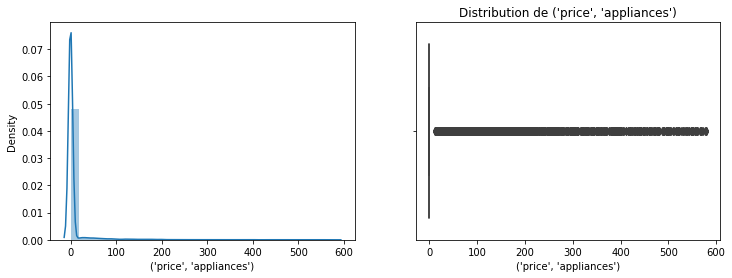

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


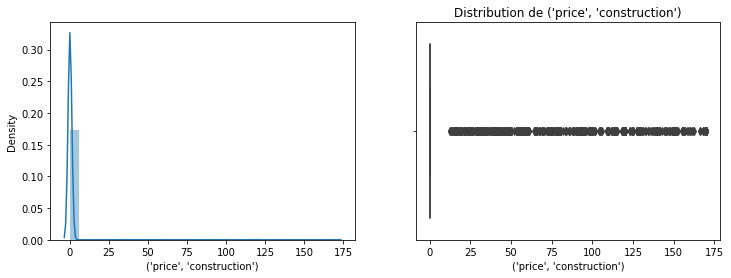

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


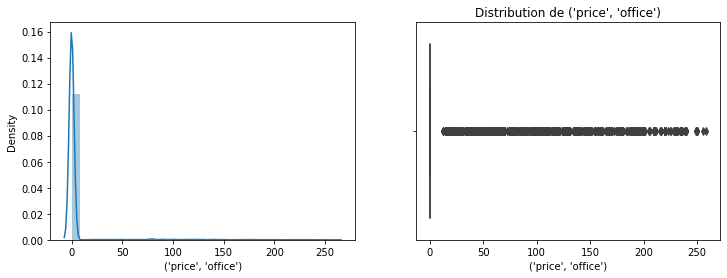

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


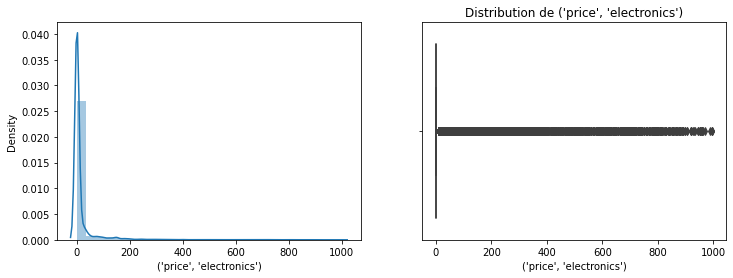

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


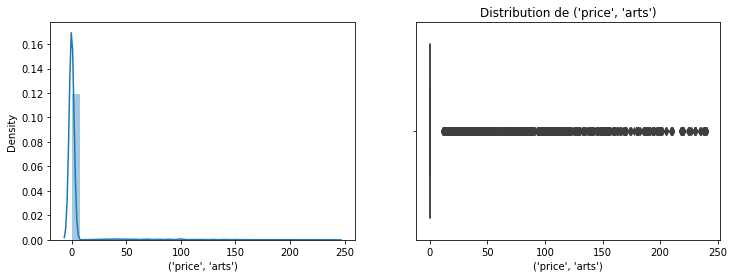

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


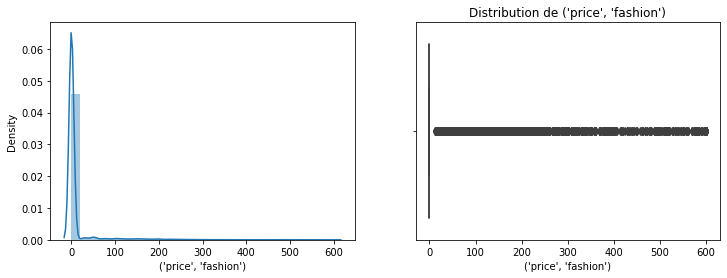

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


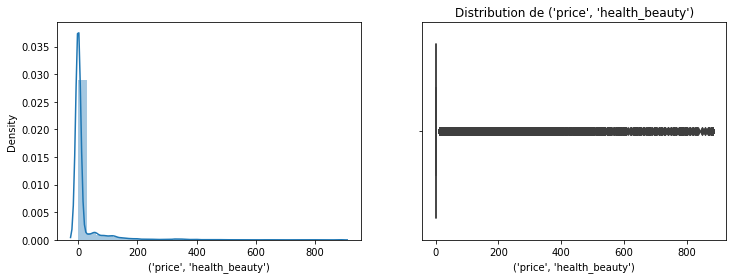

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


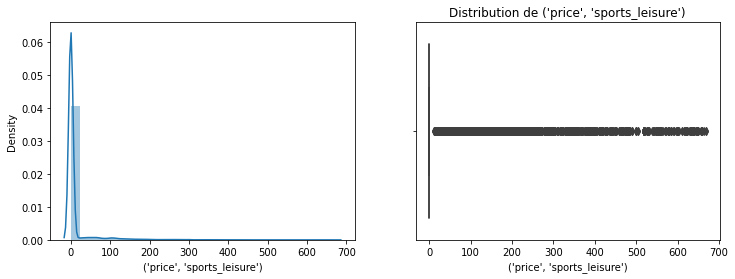

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


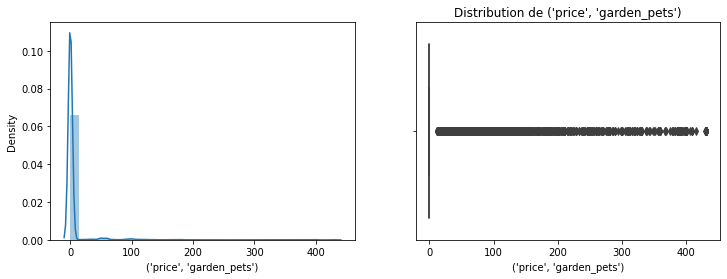

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


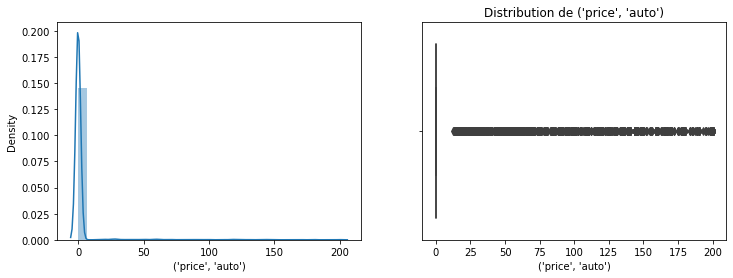

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


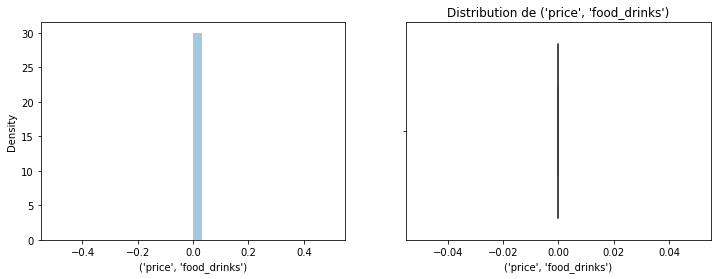

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


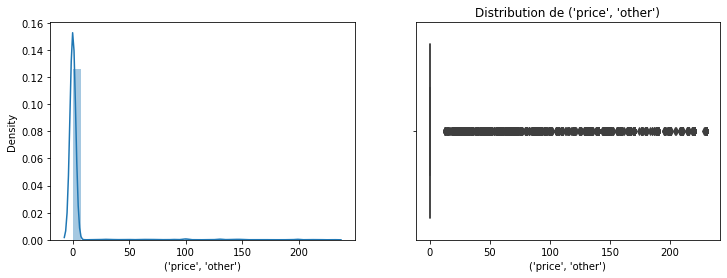

In [37]:
%matplotlib inline
for column in data_clients.select_dtypes(['int32', 'float64']).columns:
    f, axes = plt.subplots(1,2, figsize=(12,4))
    titre = 'Distribution de ' + str(column)
    plt.title(titre)
    sns.distplot(data_clients[column], bins=30, ax=axes[0])
    titre = 'Distribution de ' + str(column)
    plt.title(titre)
    sns.boxplot(data_clients[column], ax=axes[1])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


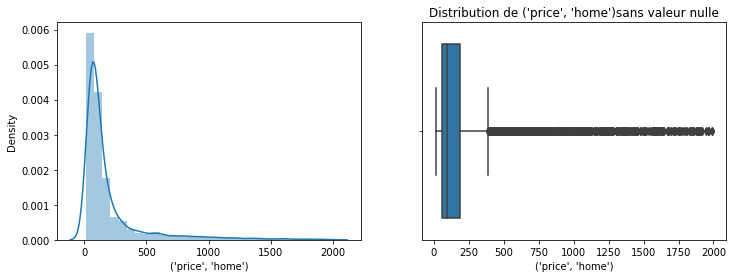

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


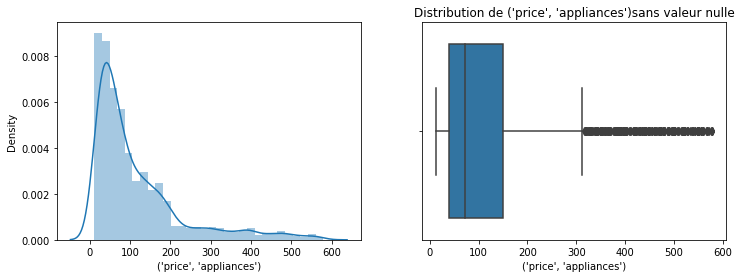

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


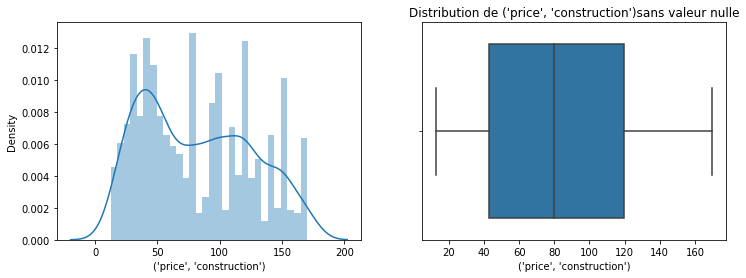

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


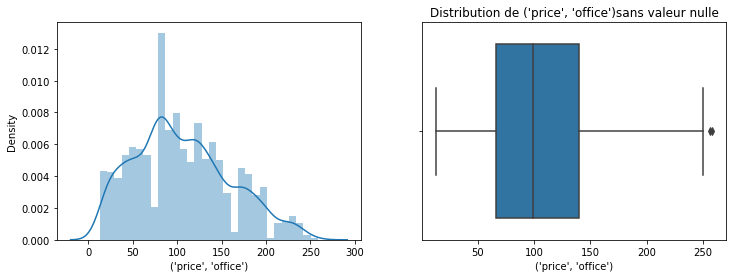

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


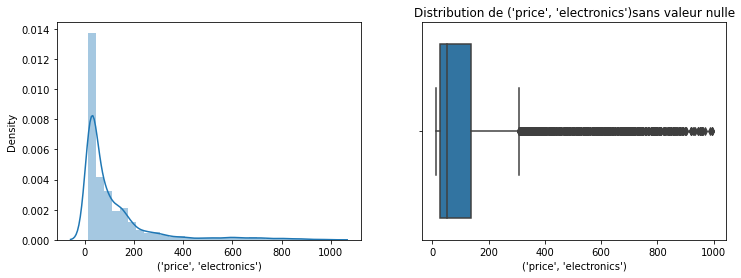

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


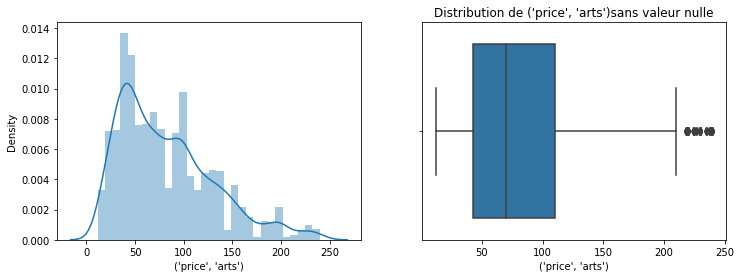

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


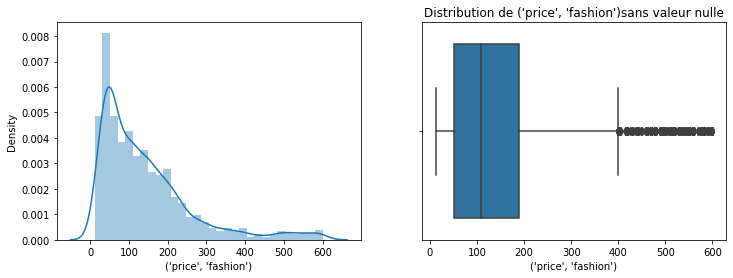

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


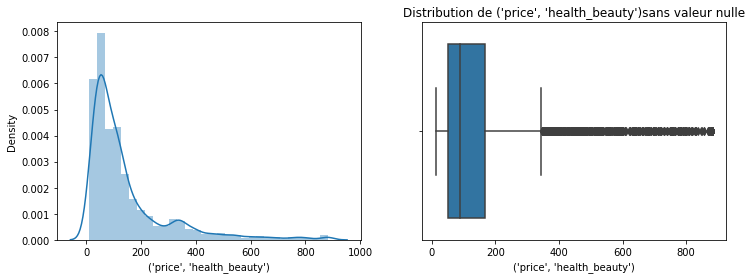

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


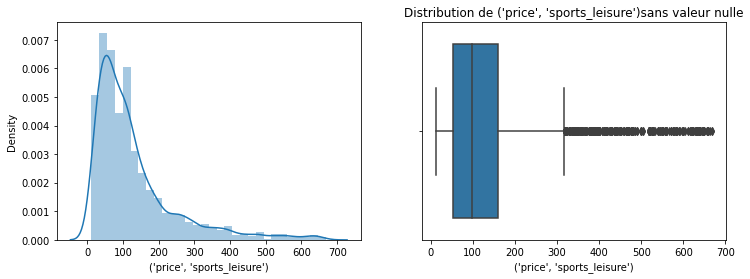

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


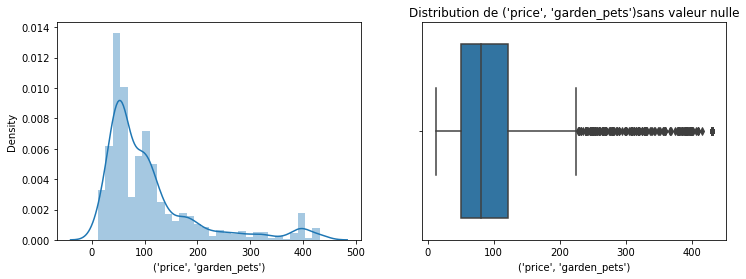

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


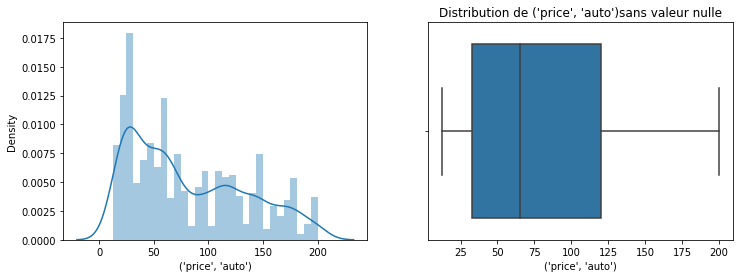

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will 

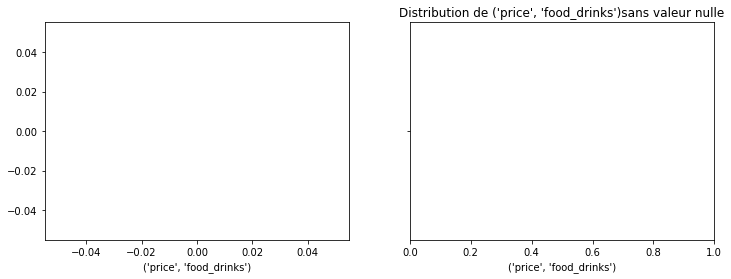

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


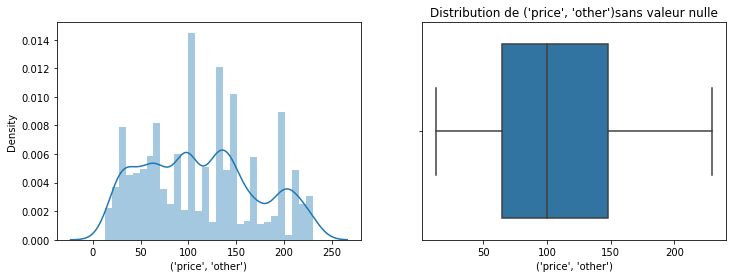

In [38]:
%matplotlib inline
for column in data_clients.select_dtypes(['int32', 'float64']).columns:
    if 'price' in column:
        f, axes = plt.subplots(1,2, figsize=(12,4))
        titre = 'Distribution de ' + str(column) +' sans valeur nulle'
        plt.title(titre)
        sns.distplot(data_clients[data_clients[column] != 0][column], bins=30, ax=axes[0])
        titre = 'Distribution de ' + str(column) +'sans valeur nulle'
        plt.title(titre)
        sns.boxplot(data_clients[data_clients[column] != 0][column], ax=axes[1])
        plt.show()

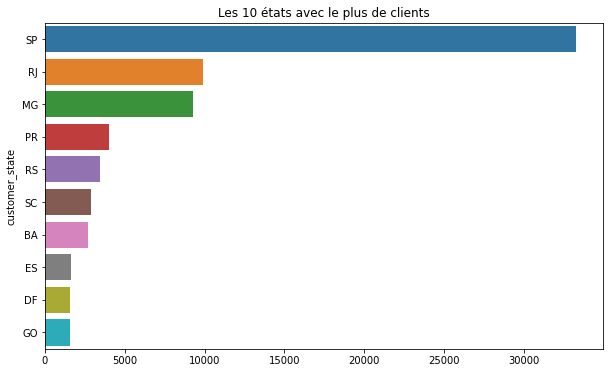

In [39]:
state = data_clients.groupby(['customer_state']).count().sort_values(
    by='customer_city', ascending=False)['customer_city'].head(10)
plt.figure(figsize=(10,6))
plt.title('Les 10 états avec le plus de clients')
sns.barplot(x = state.values,
           y = state.index)

In [40]:
data_clients

,Cat_la_plus_achetee,customer_zip_code_prefix,customer_city,customer_state,Nb_pdts,Tot_moy_achats,Mont_max_achats,Delai_Moy_Commande,Nb_moy_pdts_par_com,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,"(price, home)","(price, appliances)","(price, construction)","(price, office)","(price, electronics)","(price, arts)","(price, fashion)","(price, health_beauty)","(price, sports_leisure)","(price, garden_pets)","(price, auto)","(price, food_drinks)","(price, other)"
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,home,7787,Other,SP,1.0,4.866765,4.866765,7.0,1.0,2018-05-10 10:56:27,10.0,3.0,115.0,5.0,credit_card,8.0,-23.340262,-46.831085,129.9,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,6053,osasco,SP,1.0,2.939162,2.939162,4.0,1.0,2018-05-07 11:11:27,11.0,0.0,118.0,4.0,credit_card,1.0,-23.559044,-46.788516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.90,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,office,88115,sao jose,SC,1.0,4.234107,4.234107,26.0,1.0,2017-03-10 21:05:03,21.0,4.0,541.0,3.0,credit_card,8.0,-27.543010,-48.634938,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,electronics,18040,sorocaba,SP,1.0,5.192957,5.192957,14.0,1.0,2017-11-14 19:45:42,19.0,1.0,292.0,5.0,credit_card,6.0,-23.505588,-47.469820,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0004bd2a26a76fe21f786e4fbd80607f,garden_pets,5036,sao paulo,SP,1.0,5.036953,5.036953,2.0,1.0,2018-04-05 19:33:16,19.0,3.0,150.0,4.0,credit_card,8.0,-23.515693,-46.690031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,154.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,fashion,95330,Other,RS,1.0,4.060443,4.060443,9.0,1.0,2017-12-17 19:14:35,19.0,6.0,259.0,5.0,boleto,1.0,-28.937008,-51.549726,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.00,0.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,health_beauty,44054,feira de santana,BA,1.0,4.172694,4.172694,31.0,1.0,2017-12-10 20:07:56,20.0,6.0,266.0,4.0,credit_card,1.0,-12.217900,-38.959237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.89,0.0,0.0,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,auto,78552,Other,MT,1.0,4.498698,4.498698,15.0,1.0,2017-02-07 15:49:16,15.0,1.0,572.0,5.0,credit_card,1.0,-11.834705,-55.508145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,89.9,0.0,0.0


In [41]:
data_clients['Cat_la_plus_achetee'].unique()

array(['home', 'health_beauty', 'office', 'electronics', 'garden_pets',
       'fashion', 'sports_leisure', 'appliances', 'auto', 'arts', 'other',
       'construction'], dtype=object)

In [42]:
products['product_weight_g'].mean()

2276.4724877841513

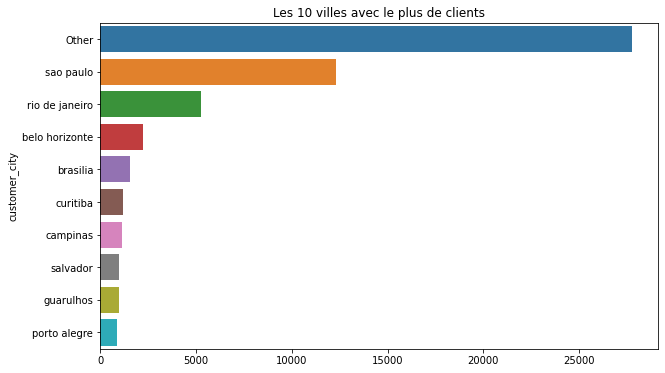

In [43]:
cities = data_clients.groupby(['customer_city']).count()[
    'customer_state'].sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.title('Les 10 villes avec le plus de clients')
sns.barplot(x = cities.values,
           y = cities.index)

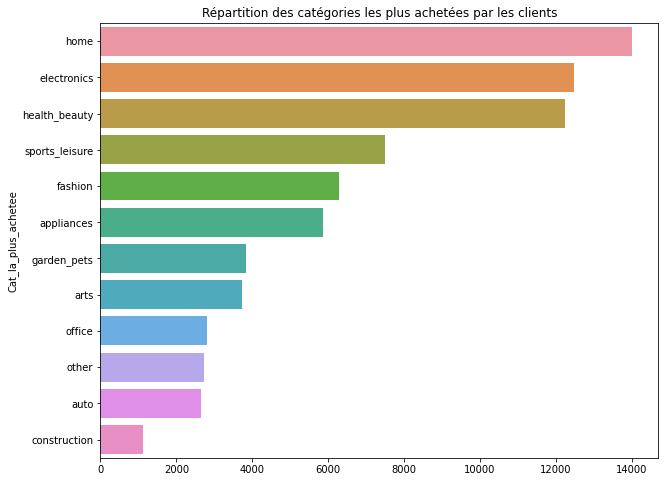

In [44]:
categories = data_clients.groupby(['Cat_la_plus_achetee']).count()[
    'customer_city'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.title('Répartition des catégories les plus achetées par les clients')
sns.barplot(x = categories.values,
           y = categories.index)

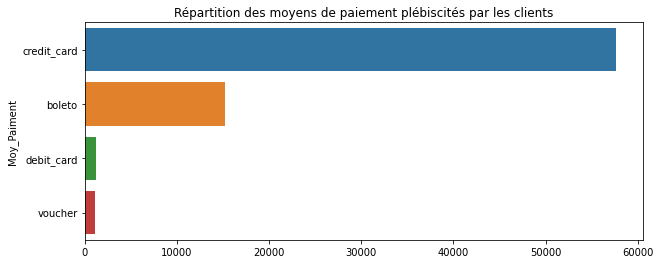

In [45]:
payment = data_clients.groupby(['Moy_Paiment']).count()[
    'customer_city'].sort_values(ascending=False)
plt.figure(figsize=(10,4))
plt.title('Répartition des moyens de paiement plébiscités par les clients')
sns.barplot(x = payment.values,
           y = payment.index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


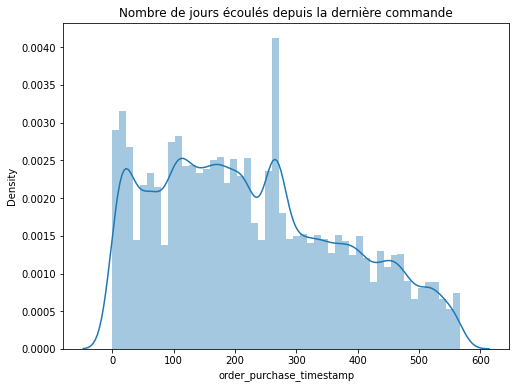

In [46]:
delai_achat = data_clients['order_purchase_timestamp'].max() - data_clients[
    'order_purchase_timestamp']
plt.figure(figsize=(8,6))
plt.title('Nombre de jours écoulés depuis la dernière commande')
sns.distplot(delai_achat.dt.days, bins=50)
plt.show()

**Conclusions sur l'analyse des distributions des variables**:

--très peu de clients ont fait plus d'un achat;

--les distributions des montants d'achat par catégorie sont d'allure exponentielle

--la variable price food drinks n'apporte pas d'information

**Corrélations**

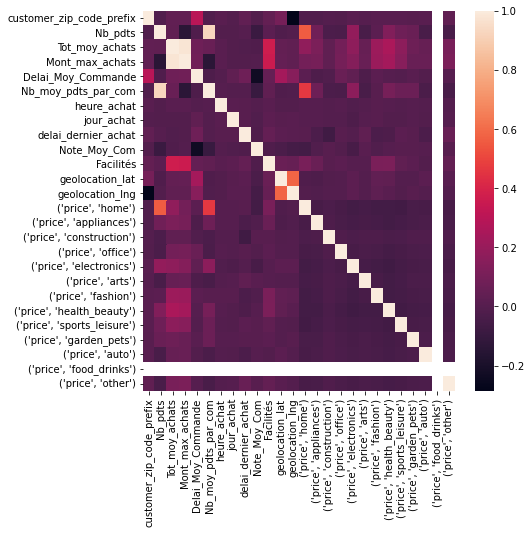

In [47]:
plt.figure(figsize=(7,7))
sns.heatmap(data_clients.corr())

On voit que certaines variables sont corrélées compte tenu du faible nombre de clients qui ont plusieurs transactions. C'est le cas de :

-- nb de produits achetés avec nombre moyen de produits par commande

--montant total des achats avec montant moyen par commande
Egalement, la feature ('price', 'food_drinks') ne contient pas d'information

On va conserver une feature sur les 2 pour chaque corrélation





In [48]:
data_clients.drop(['Mont_max_achats','Nb_moy_pdts_par_com'], axis=1, inplace=True)

In [49]:
data_clients

,Cat_la_plus_achetee,customer_zip_code_prefix,customer_city,customer_state,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,"(price, home)","(price, appliances)","(price, construction)","(price, office)","(price, electronics)","(price, arts)","(price, fashion)","(price, health_beauty)","(price, sports_leisure)","(price, garden_pets)","(price, auto)","(price, food_drinks)","(price, other)"
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,home,7787,Other,SP,1.0,4.866765,7.0,2018-05-10 10:56:27,10.0,3.0,115.0,5.0,credit_card,8.0,-23.340262,-46.831085,129.9,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,6053,osasco,SP,1.0,2.939162,4.0,2018-05-07 11:11:27,11.0,0.0,118.0,4.0,credit_card,1.0,-23.559044,-46.788516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.90,0.0,0.0,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,office,88115,sao jose,SC,1.0,4.234107,26.0,2017-03-10 21:05:03,21.0,4.0,541.0,3.0,credit_card,8.0,-27.543010,-48.634938,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,electronics,18040,sorocaba,SP,1.0,5.192957,14.0,2017-11-14 19:45:42,19.0,1.0,292.0,5.0,credit_card,6.0,-23.505588,-47.469820,0.0,0.0,0.0,0.0,180.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
0004bd2a26a76fe21f786e4fbd80607f,garden_pets,5036,sao paulo,SP,1.0,5.036953,2.0,2018-04-05 19:33:16,19.0,3.0,150.0,4.0,credit_card,8.0,-23.515693,-46.690031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,154.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb09418989a0dbff854a28163e47c6,fashion,95330,Other,RS,1.0,4.060443,9.0,2017-12-17 19:14:35,19.0,6.0,259.0,5.0,boleto,1.0,-28.937008,-51.549726,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.00,0.0,0.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,health_beauty,44054,feira de santana,BA,1.0,4.172694,31.0,2017-12-10 20:07:56,20.0,6.0,266.0,4.0,credit_card,1.0,-12.217900,-38.959237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.89,0.0,0.0,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,auto,78552,Other,MT,1.0,4.498698,15.0,2017-02-07 15:49:16,15.0,1.0,572.0,5.0,credit_card,1.0,-11.834705,-55.508145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,89.9,0.0,0.0


**Export jeu de données**

In [50]:
data_clients.select_dtypes(['object']).nunique()

Cat_la_plus_achetee    12
customer_city          98
customer_state         22
Moy_Paiment             4
dtype: int64

In [51]:
data_clients.to_csv('/content/data_cleaned.csv')

In [52]:
data_clients.sample(10)

,Cat_la_plus_achetee,customer_zip_code_prefix,customer_city,customer_state,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,order_purchase_timestamp,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Moy_Paiment,Facilités,geolocation_lat,geolocation_lng,"(price, home)","(price, appliances)","(price, construction)","(price, office)","(price, electronics)","(price, arts)","(price, fashion)","(price, health_beauty)","(price, sports_leisure)","(price, garden_pets)","(price, auto)","(price, food_drinks)","(price, other)"
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
951a6d4dc50443180d5e4f20f02693ad,appliances,2207,sao paulo,SP,1.0,3.173878,6.0,2018-08-19 20:01:06,20.0,6.0,14.0,5.0,credit_card,3.0,-23.485996,-46.587964,0.00,23.9,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d8ba8c5553a562b95fcb9de3a4d81446,home,73105,brasilia,DF,9.0,4.510530,14.0,2018-05-29 18:09:04,18.0,1.0,96.0,5.0,credit_card,1.0,-15.663650,-47.860166,818.73,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2a92af30e96bef1484e8b3813b9002c8,office,44078,feira de santana,BA,1.0,4.381902,31.0,2017-09-18 17:11:28,17.0,0.0,349.0,5.0,credit_card,6.0,-12.267828,-38.933410,0.00,0.0,0.0,79.99,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
d6b1bb1b50ce85edbf28f0e7c19c2498,appliances,17230,Other,SP,1.0,6.040255,12.0,2018-03-22 15:59:15,15.0,3.0,164.0,5.0,credit_card,8.0,-22.234624,-48.722202,0.00,420.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109bcefca23471289951ceed99c55521,electronics,29045,vitoria,ES,1.0,3.756304,9.0,2017-12-04 15:51:42,15.0,0.0,272.0,5.0,boleto,1.0,-20.299129,-40.307425,0.00,0.0,0.0,0.00,42.79,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
659d538861aefdc979c84bbed329df7d,health_beauty,20520,rio de janeiro,RJ,1.0,4.786658,20.0,2017-09-03 09:47:58,9.0,6.0,364.0,5.0,boleto,1.0,-22.926393,-43.232052,0.00,0.0,0.0,0.00,0.00,0.00,0.0,119.9,0.0,0.0,0.0,0.0,0.0
30cc7860f832668d8fee80418948428f,electronics,13401,piracicaba,SP,1.0,2.509599,6.0,2018-01-18 10:20:43,10.0,3.0,227.0,5.0,credit_card,1.0,-22.751498,-47.659231,0.00,0.0,0.0,0.00,12.30,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8934c160f9f016e15f2823b6d54909ea,arts,20950,rio de janeiro,RJ,1.0,3.608212,15.0,2017-02-03 11:33:20,11.0,4.0,576.0,5.0,credit_card,2.0,-22.904025,-43.256398,0.00,0.0,0.0,0.00,0.00,36.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9e22c659d0383dfce29dd8008e577b1f,arts,13845,Other,SP,1.0,5.201531,13.0,2017-05-06 12:16:19,12.0,5.0,484.0,5.0,credit_card,4.0,-22.356695,-46.951099,0.00,0.0,0.0,0.00,0.00,181.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
data_clients.describe()

,customer_zip_code_prefix,Nb_pdts,Tot_moy_achats,Delai_Moy_Commande,heure_achat,jour_achat,delai_dernier_achat,Note_Moy_Com,Facilités,geolocation_lat,geolocation_lng,"(price, home)","(price, appliances)","(price, construction)","(price, office)","(price, electronics)","(price, arts)","(price, fashion)","(price, health_beauty)","(price, sports_leisure)","(price, garden_pets)","(price, auto)","(price, food_drinks)","(price, other)"
count,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.000000,75231.0,75231.000000
mean,33345.297989,1.226383,4.332713,12.045103,14.804841,2.752389,240.435007,4.147614,2.705843,-21.566111,-46.084666,36.498046,8.981854,1.237314,3.952901,18.970038,4.098424,11.913777,23.507495,12.940556,5.545247,2.860662,0.0,4.070337
std,29166.366052,0.893501,0.794052,7.668252,5.310235,1.971846,148.454102,1.288243,2.431877,4.870428,3.596411,143.177744,43.986986,11.358075,22.599644,76.147540,20.969929,52.523653,81.401029,53.565676,31.440920,17.966264,0.0,23.743568
min,1003.000000,1.000000,2.484907,-1.000000,0.000000,0.000000,13.000000,1.000000,1.000000,-30.079022,-56.084484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,9861.000000,1.000000,3.804438,7.000000,11.000000,1.000000,119.000000,4.000000,1.000000,-23.590141,-47.911140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,22783.000000,1.000000,4.370460,10.000000,15.000000,3.000000,222.000000,5.000000,1.500000,-22.937563,-46.622399,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,47800.000000,1.000000,4.867534,15.000000,19.000000,4.000000,349.000000,5.000000,4.000000,-20.430660,-43.673846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,99980.000000,10.000000,6.840547,46.000000,23.000000,6.000000,580.000000,5.000000,10.000000,-2.515916,-34.932184,1992.000000,579.000000,169.990000,258.500000,996.300000,239.920000,599.900000,882.560000,669.000000,431.200000,199.990000,0.0,229.990000


In [54]:
dt = pd.read_csv('/content/data_cleaned.csv')

In [55]:
dt.shape

(75231, 30)